# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `27`
* Students: `Abrate Marco Pietro, Bolón Brun Natalie, Kakavandy Shahow, Park Jangwon`
* Dataset: `Terrorist attacks and relations`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
start_time = time.time()

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [10]:
def data_load_parsing(): 
    """
    This function is for loading each of the files in TerrorAttack and TerroristRel
    and parsing them into tables of panda dataframe format that we can use.
    
    input: none
    output:
        terrorist_rel_labels: terrorist relationship types (colleague, family, ...)
        terrorist_rel_edges: terrorists that have some kind of relationship are linked
        terrorist_rel_coll: terrorists who are 'colleagues' are linked
        terrorist_rel_cong: terrorists who are 'congregates' are linked
        terrorist_rel_cont: terrorists who are 'contacts' are linked
        terrorist_rel_fam: terrorists who are 'families' are linked.
        
        *the columns of each dataframe are type integer and begins with 0, ...
    """
    
    # file paths
    file_path1 = '../data/TerroristRel/TerroristRel.edges'
    file_path2 = '../data/TerroristRel/TerroristRel.labels'
    file_path3 = '../data/TerroristRel/TerroristRel_Colleague.nodes'
    file_path4 = '../data/TerroristRel/TerroristRel_Congregate.nodes'
    file_path5 = '../data/TerroristRel/TerroristRel_Contact.nodes'
    file_path6 = '../data/TerroristRel/TerroristRel_Family.nodes'

    '''Load and parse TerroristRel.edges'''
    terrorist_rel_edges = pd.read_csv(file_path1, sep='\t', header=None)
    
    '''Load and parse TerroristRel.labels'''
    terrorist_rel_labels = pd.read_csv(file_path2, header=None)
    
    '''Load and parse TerroristRel_Colleage.nodes'''
    # Parse using tab and space delimiters
    terrorist_rel_coll = pd.read_csv(file_path3, sep='\t|' '', header=None)
    
    '''Load and parse TerroristRel_Congregate.nodes'''
    # Parse using tab and space delimiters
    terrorist_rel_cong = pd.read_csv(file_path4, sep='\t|' '', header=None)
    
    '''Load and parse TerroristRel_Contact.nodes'''
    # Parse using tab and space delimiters
    terrorist_rel_cont = pd.read_csv(file_path5, sep='\t|' '', header=None)
    
    '''Load and parse TerroristRel_Family.nodes'''
    # Parse using tab and space delimiters
    terrorist_rel_fam = pd.read_csv(file_path6, sep='\t|' '', header=None)
    
    return terrorist_rel_labels, terrorist_rel_edges, terrorist_rel_coll, \
terrorist_rel_cong, terrorist_rel_cont, terrorist_rel_fam

# call data_load_parsing
terrorist_rel_labels, terrorist_rel_edges, terrorist_rel_coll, \
terrorist_rel_cong, terrorist_rel_cont, terrorist_rel_fam = data_load_parsing()


features = terrorist_rel_coll.shape[1] - 2

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Marco\Anaconda3\lib\site-packages\pandas\io\parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\Users\Marco\Anaconda3\lib\site-packages\pandas\io\parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.

In [11]:
# Test run to check whether data has been parsed properly

# Edges data
print(terrorist_rel_edges.shape)

# Colleague nodes
print(terrorist_rel_coll.shape)

# Contact nodes
print(terrorist_rel_cont.shape)

# Congregate nodes
print(terrorist_rel_cong.shape)

# Family nodes
print(terrorist_rel_fam.shape)

(8592, 2)
(851, 1226)
(851, 1226)
(851, 1226)
(851, 1226)


### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in [this tutorial](../tutorials/02a_graph_from_edge_list.ipynb).

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. [This tutorial](../tutorials/02b_graph_from_features.ipynb) shows you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [12]:
nodes = terrorist_rel_coll.iloc[:,0]
edges = terrorist_rel_edges

nodes = pd.DataFrame(list(nodes))
nodes.reset_index(level=0, inplace=True)
nodes = nodes.rename(columns={'index':'node_idx'})
nodes.head()

,node_idx,0
0,0,http://profilesinterror.mindswap.org/document/...
1,1,http://profilesinterror.mindswap.org/document/...
2,2,http://profilesinterror.mindswap.org/document/...
3,3,http://profilesinterror.mindswap.org/document/...
4,4,http://profilesinterror.mindswap.org/document/...


In [13]:
# check number of nodes
print(nodes.shape)

(851, 2)


In [14]:
# Create a conversion table from uid to node index.
node2idx = nodes[['node_idx', 0]]
node2idx = node2idx.set_index(0)

In [15]:
# Add a new column, matching the uid with the node_idx.
edges = edges.join(node2idx, on=0)
edges = edges.join(node2idx, on=1, rsuffix='_parent')

edges = edges.drop(columns=[0,1])

In [16]:
n_nodes = len(nodes)
print('Total number of nodes: {}'.format(n_nodes))

# define adjacency matrix of size n_nodes
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

# fill in the adjacency matrix
for idx, row in edges.iterrows():
    if np.isnan(row.node_idx) or np.isnan(row.node_idx_parent):
        pass
    else:
        i, j = int(row.node_idx), int(row.node_idx_parent)
        adjacency[i, j] = 1
        adjacency[j, i] = 1

Total number of nodes: 851


In [17]:
# test run to view the first several entries of the adjacency matrix
adjacency[:15, :15]

array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]])

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

Text(0.5,1.05,'adjacency matrix')

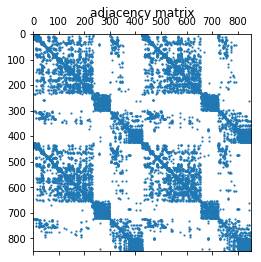

In [18]:
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [19]:
# theoretical Lmax given N nodes
L_max = n_nodes * (n_nodes - 1) / 2
print("Theoretical maximum number of links = {L:}".format(L=int(L_max)))

# number of links in our network
n_links = np.count_nonzero(adjacency)/2
print("Total number of links = {L:}".format(L=int(n_links)))

Theoretical maximum number of links = 361675
Total number of links = 8196


**Answer:**

The maximum number of links in a network with N nodes is given by $L_{max}$ = ($N$) ($N-1$)/$2$. In our case, the network has **851 nodes** which results in a maximum of **361 675 edges**. 

The number of edges of our network is given by the number of non zero elements of our matrix divided by two (**8196 links**) as we are working with an undirected graph.

The total number of links is much smaller than the theoretical maximum number of links at a **ratio of 0.023**. Therefore, the network can be considered sparse.

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**Answer:**

Our graph is **undirected** as the edges represent terrorist groups/names, and therefore it has no directional meaning.

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [20]:
# Save features and adjacency matrix
features = terrorist_rel_coll.iloc[:,0:1225]
features.to_csv("features")
np.save('adjacency.npy',adjacency)
np.savetxt('adjacency.txt',adjacency)

### Question 4

Are the edges of your graph weighted?

**Answer:**

Our edges are not weighted as they only represent the existence of a relation.

### Question 5

What is the degree distibution of your network? 

In [21]:
degree =  adjacency.sum(axis=1)
assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

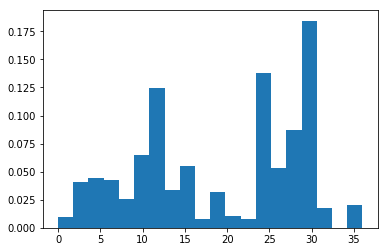

In [22]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights, bins =20);

What is the average degree?

In [23]:
avg_degree = sum(degree)/n_nodes
print("Average degree: {A:.5f}".format(A=avg_degree))

Average degree: 19.26204


In [30]:
print("Maximum degree: %d" %max(degree))
print("Nodes with degree below the average degree: %d" %len(degree[degree < avg_degree]))
print("Nodes with degree above the average degree: %d" %len(degree[degree > avg_degree]))

Maximum degree: 36
Nodes with degree below the average degree: 410
Nodes with degree above the average degree: 441


### Question 6

Comment on the degree distribution of your network.

**Answer:**

From the degree distribution, we can confirm the sparsity of our network as the maximum degree we can find (36) is far away from the theoretical maximum given by $N-1$ which is 850. 

There are only a few nodes about the average degree, and we can distinguish two groups with two 'peaks' (below and above degree 20) where there are the greatest number of nodes with degree between 10 and 13 or between 25 and 30. This indicates that there is roughly equal numbers of nodes above (441 nodes) and below (410 nodes) the average degree, and may have an implication of a disconnected graph with two or more connected components.

This is characteristically different from a random network, which has the greatest number of nodes about the average degree and nearly no hubs. This is somewhat similar to but also characteristically different from a scale-free network, which has many nodes with a low degree and a few hubs. This is again largely due to the fact that our network has only a few nodes with the average degree.

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

#### Defining breadth first search algorithm

In [31]:
# define breadth first search algorithm which will be useful for answering some of questions 7 - 14

def breadth_first_search(graph, start):
    '''Takes the adjacencay matrix (graph) and the startin vertex.
    Returns a dictionary whose keys represent (hop) distance from start vertex\
    and values represent all vertices located at that distance from start vertex.
    Only the shortest path is counted.'''
    
    # define a set for all visited nodes.
    visited = set()
    # define dictionary; keys are distances; values are vertices at that distance (from start vertex)
    visited_dict = dict({0: {start}})
    # define a set to keep track of all searched nodes in the BFS algorithm
    searched = set([start])
    
    # all vertices found in the process of BFS are added to the list
    queue = [start]
    while queue:
        # next vertex in the queue
        vertex = queue.pop(0)
        
        if vertex not in visited:
            visited.add(vertex)
            
            # define all the neighbors of the current vertex
            neighbors = set([i for i, x in enumerate(adjacency[vertex]) if x==1])
            
            # get key of current vertex
            for n in range(len(list(visited_dict.values()))):
                if vertex in list(visited_dict.values())[n]:
                    key = list(visited_dict.keys())[list(visited_dict.values()).index(list(visited_dict.values())[n])]

            # create a new key if key + 1 does not exist yet
            if visited_dict.get(key+1) == None: 
                visited_dict.update({key+1: set()}) # define an empty set for the value of new key
            # update the value of the new key
            visited_dict.get(key+1).update(neighbors - searched)
            searched.update(neighbors)
            
            # add only ones that have not yet been visited to the queue
            queue.extend(neighbors - visited)
    return visited_dict

#### Computing connectivity of the graph

In [32]:
def connected_graph(adjacency):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """
    
    # define all nodes visited in the BFS algorithm when we start from a randomly chosen vertex
    starting_vertex = 0
    visited_dict = breadth_first_search(adjacency, starting_vertex)
    # count total number of vertices
    temp_list = list(visited_dict.values())[:-1] #by default, the last element is an empty set
    count = 0
    for i in range(len(temp_list)):
        count += len(temp_list[i])
    
    # if number of visited vertices equal to total number of vertices, then graph is connected
    if count == len(adjacency):
        return True
    
    return False

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [33]:
print(connected_graph(adjacency))

False


***Answer:***
No, the graph is not connected.

### Question 8

Write a function that extracts the connected components of a graph.

In [34]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    
    components = []
    # initially, the search list is all the nodes
    search_list = set(range(len(adjacency)))
    
    # run until the search_list is exhausted
    while search_list:
        # next vertex in queue
        vertex = list(search_list).pop(0)
        
        # define an empty adjacency matrix for a component
        component = np.zeros((len(adjacency), len(adjacency)), dtype=int)
        
        visited_dict = breadth_first_search(adjacency, vertex)
        
        # define empty set to collect all nodes in the component
        all_nodes = set()
        nodes_sets = list(visited_dict.values())[:-1] #by default, the last element is an empty set
        for i in range(len(nodes_sets)):
            all_nodes.update(nodes_sets[i])
        
        # create the adjacency matrix for the component
        component[list(all_nodes),:] = adjacency[list(all_nodes),:]
        component[:,list(all_nodes)] = adjacency[:,list(all_nodes)]
        
        # reduce search list by all vertices found in 'visited'
        search_list = search_list - all_nodes

        # add component to list
        components.append(component)
    
    return components

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [35]:
# find all components within the network
components = find_components(adjacency)
print("Number of connected components: {N:}".format(N=len(components)))

def num_nodes(adjacency):
    '''outputs the number of nodes in a graph given that it is connected'''
    return np.count_nonzero(np.sum(adjacency, axis=1))

# find largest component
def find_largest_component(components):
    '''Takes the list of all components as input.
    Returns the largest component (in terms of number of nodes) and its size.'''
    size = 0
    for c in range(len(components)):
        n = num_nodes(components[c])
        if n > size:
            size = n
            largest_component_index = c
    return components[largest_component_index], size

largest_component, size = find_largest_component(components)
print("Size of the largest component: {N:} nodes (and {L:} links)".format(N=size, L=len(largest_component.dot(np.ones(len(adjacency))))))

Number of connected components: 13
Size of the largest component: 665 nodes (and 851 links)


### Graphical representation of the components

851


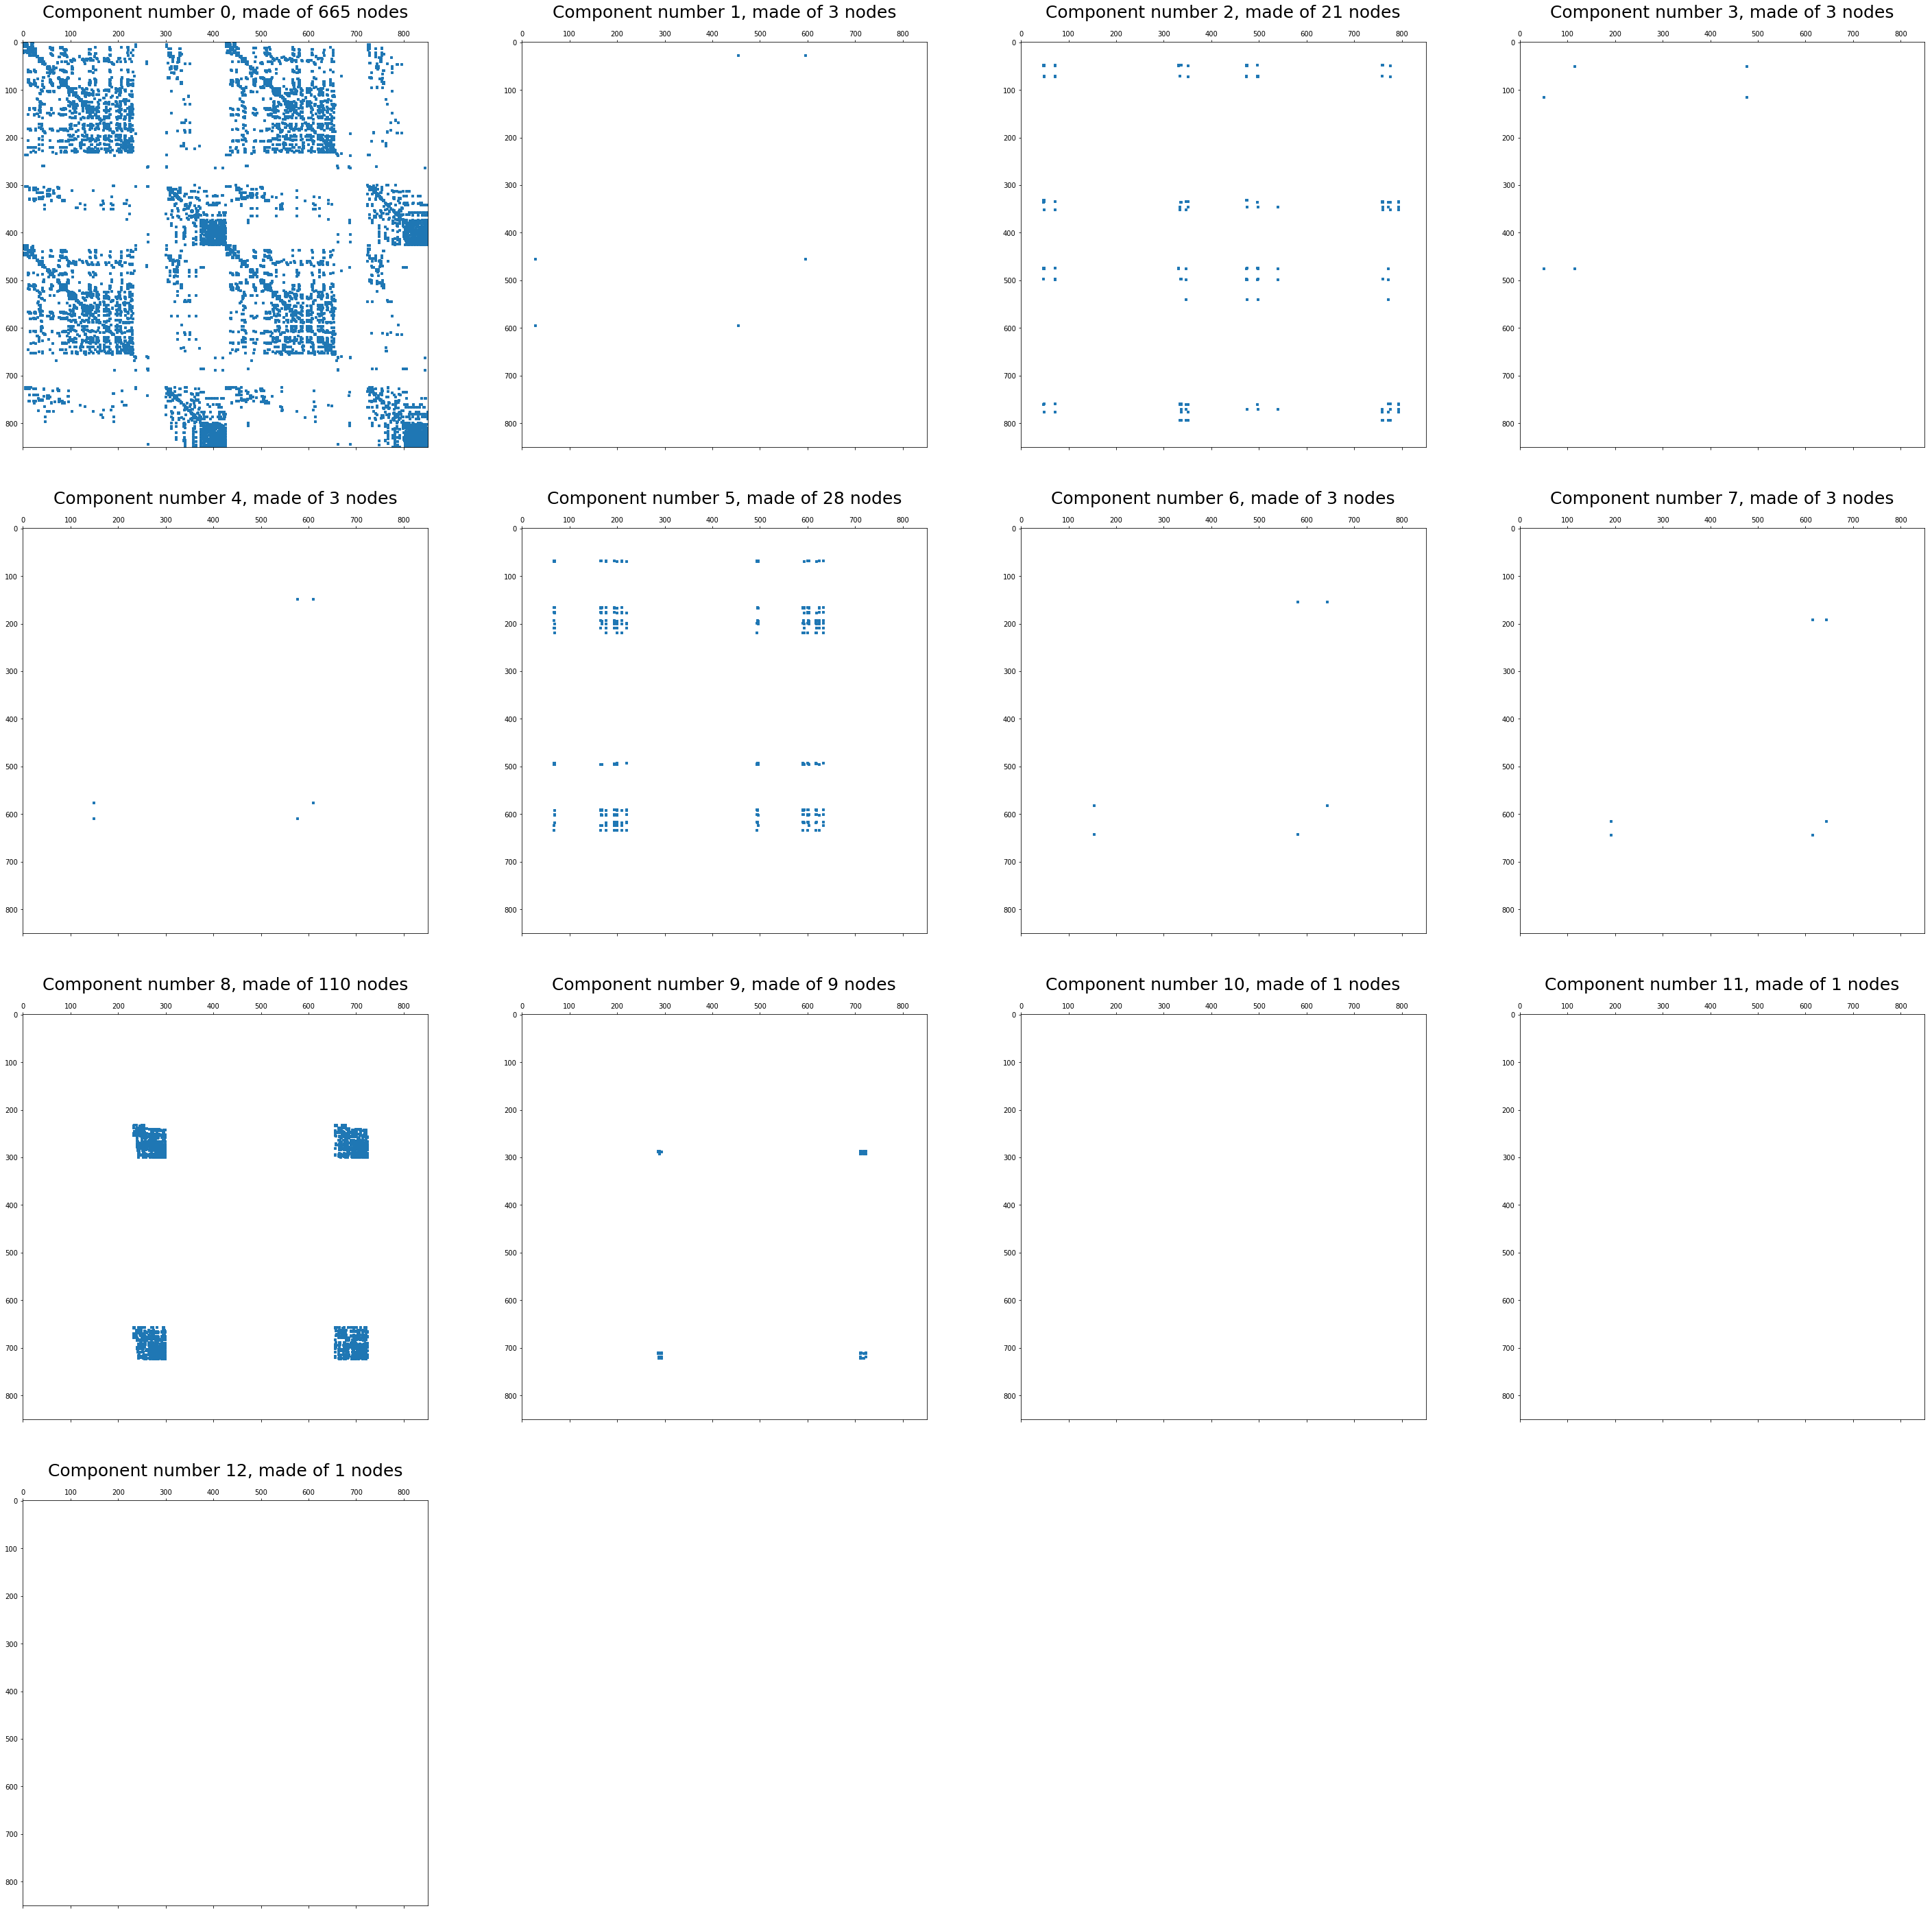

In [36]:
n_nodes_comp = 0
f = plt.figure(figsize=(50,50))
for i, component in enumerate(components):
    ax = f.add_subplot(4,4,i+1)
    plt.spy(component, markersize=3)
    nodes = num_nodes(component)
    if (nodes == 0):
        nodes += 1
    plt.title("Component number {i:}, made of {nodes:} nodes".format(i=i, nodes=nodes), fontsize=25)
    n_nodes_comp += nodes
    
print(n_nodes_comp)

We can see the last three components do not contain any edge. This is due to the fact that there are **three isolated nodes** in our network (it can also be seen from the degree distribution where there are three nodes with degree 0).

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [37]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    
    shortest_path_lengths = np.zeros(len(adjacency)) - 1
    visited_dict = breadth_first_search(adjacency, source)
    
    list_visited_values = list(visited_dict.values())
    list_visited_keys = list(visited_dict.keys())
    
    for node in range(len(adjacency)):
        for n in range(len(list_visited_values)):
                if node in list(list_visited_values)[n]:
                    # the keys in the distionary are hop distances
                    shortest_path_length = list_visited_keys[list_visited_values.index(list_visited_values[n])]
                    shortest_path_lengths[node] = int(shortest_path_length)
        
    # entries whose values are -1 mean they were disconnected
    shortest_path_lengths[shortest_path_lengths == -1] = float('inf')
    
    return shortest_path_lengths

In [38]:
# test run
shortest_path_lengths = compute_shortest_path_lengths(adjacency, 4)
# node 333 is part of the second component, made of 21 nodes, as seen above
shortest_path_lengths_2 = compute_shortest_path_lengths(adjacency, 333)

In [42]:
print("Number of non-inf for component 2 (should be 21 as seen above): %d"\
      % len(np.where(shortest_path_lengths_2 != float('inf'))[0]))
print("Number of non-inf for component 0 (should be 665 as seen above): %d"\
      % len(np.where(shortest_path_lengths != float('inf'))[0]))

print(shortest_path_lengths)

Number of non-inf for component 2 (should be 21 as seen above): 21
Number of non-inf for component 0 (should be 665 as seen above): 665
[ 2.  2.  2.  2.  0.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  3.  3.  3.  3.  3.  3. inf  4.  4.  4.  7.  4.  4.  4.  4.
  4.  4.  4.  4.  3.  4.  4.  4.  7.  7. inf inf inf inf  4.  4.  4.  6.
  5.  5.  3.  3.  3.  3.  3.  3.  6.  5.  5.  6. inf inf inf  7. inf inf
  4.  4.  4.  5.  5.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  8.  8.  8. inf  7.  7.  5.  5.  8.  8.  8.  8.  5.  5.  5.
  5.  5.  5.  7.  8.  8.  5.  5.  5.  5.  5.  5.  3.  3.  3.  5.  5.  5.
  5.  5.  5.  5. inf  5.  3.  3.  3. inf  5.  5.  5.  5.  5.  8.  7.  8.
  8.  7. inf inf inf  4.  6.  7.  5.  5.  5.  5.  5. inf inf  5.  5.  5.
  5.  3.  3.  3.  6.  5.  7.  7.  7.  7. inf  9. inf inf  5.  5.  5.  7.
 inf inf  5.  5.  5.  5.  5.  3.  3.  5. inf  8.  8.  8.  7. 

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [45]:
def compute_diameter(adjacency):
    """returns the diameter of the provided graph.\
    Returns diameter (length of the longest shortest path between any pair of nodes)"""
    
    # number of nodes in the graph
    list_of_nodes = np.where(np.sum(adjacency, axis=1) > 0)[0]
    # initialize diameter to be 0
    diameter = 0
    
    for _, node in enumerate(list_of_nodes):
        shortest_path_lengths = compute_shortest_path_lengths(adjacency, node)
        
        # exclude infinite distances i.e. disconnected nodes
        shortest_path_lengths = shortest_path_lengths[shortest_path_lengths != float('inf')]
        max_s = max(shortest_path_lengths)
        
        if max_s > diameter:
            diameter = max_s
    
    return int(diameter)

In [47]:
diameter = compute_diameter(adjacency)
print("Diameter of network: {D:}".format(D=diameter))

Diameter of network: 14


### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [48]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    #First, check if there is at least one path and if the shortest path is not longer than we require.
    distance = compute_shortest_path_lengths(adjacency, source)[target]

    if distance > length:
        return 0
    
    else:
        A = np.linalg.matrix_power(adjacency,length)
        return A[source,target]

Test your function on 5 pairs of nodes, with different lengths.

In [49]:
print(compute_paths(adjacency, 0, 10, 1))
print(compute_paths(adjacency, 0, 10, 2))
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 13, 67, 2))
print(compute_paths(adjacency, 15, 93, 4))

0
0
2
0
12


### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [50]:
def number_paths(adjacency, length):
    A = np.linalg.matrix_power(adjacency,length)
    A_paths = np.triu(A)
    return np.sum(A_paths)

number_paths(adjacency, 3)

5216465

Our network has **5216465** paths of length 3

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [51]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    # CC  =2*L/(k*(k-1))
    # k := Number of neighbors
    # L := Number of links between neighbor nodes
    
    # Get the list of all neighbor nodes
    neighbors = np.nonzero(adjacency[:,node])[0]

    k = len(neighbors)
    if k < 2:
        return 0
    
    # Generate adjacency matrix of neighbor nodes to count their links
    else:
        A = np.take(np.take(adjacency, neighbors, axis=0), neighbors, axis=1)
        L = np.sum(A)/2
        clustering_coefficient = 2*L/(k*(k-1))
    
    
    return float(clustering_coefficient)

In [52]:
# Select a node
node = 749

# Get the largest component of our graph which includes our node
components = find_components(adjacency)
c = np.array([sum(A[node,:]) for A in components])

# Compute its clustering coefficient. 
if (len(np.where(c > 0)[0]) == 0):
    # Isolated node
    print("Clustering coefficient for node {J}: {A}".format(J= node,A = 0))
else:
    adj = components[np.where(c > 0)[0][0]]
    print("Clustering coefficient for node {J}: {A:.5f}".format(J= node, A=compute_clustering_coefficient(adjacency,node)))

Clustering coefficient for node 749: 0.84848


### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [53]:
largest_component, size = find_largest_component(components)
nodes = np.where(np.sum(largest_component, axis=1) > 0)[0]

CC = [compute_clustering_coefficient(largest_component, i) for i in nodes]
print("Size of largest connected component: {}".format(size))
print("Average clustering coefficient: {A:.5f}".format(A = sum(CC)/len(CC)))

Size of largest connected component: 665
Average clustering coefficient: 0.57030


### Total execution time:

In [54]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1293.3463020324707 seconds ---
